In [1]:
# reading MERRA2 hourly files, running through a year,
#  and outputting a mean grid at its native resolution as downloaded
import h5py
import glob

In [2]:
mdir = '/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/'
yr = '15' # year 20x
days  = sorted(glob.glob(mdir+'3A-DAY.GPM.GMI*.HDF5'))

In [3]:
gsize = 0.25 # in degrees, normal grid
latmax= 90  # NS latitude limits of grid (limited due to daylight )
yy = 90-latmax
nx, ny = int(360.0/gsize), int(2.0*latmax/gsize) 
mean_grid_iwp = np.zeros([ny, nx])
zonal_mean_iwp = np.zeros(ny)
count = np.zeros([ny, nx]) # initialize
ndays = 0
iwpall =[]

In [17]:
for d in days:#[0:200:10]:#[0:1]:
#for d in range(len(f_terra[0:30])):
    #if ndays % 20 == 0: print(d)
    print(d)
    f = h5py.File(d,'r')
    iwp = np.flipud(np.transpose(f['Grid/iceWaterPath'][:,yy:int(180/gsize-yy)]))
    #iwp = np.array( 0.001 * hdf.select('Cloud_Water_Path_Ice_Mean')[:,:] )
    iwp[ iwp < 0 ] = np.nan
    ndays += 1 # count days processed
    daily_combined = np.zeros([ny,nx]) #+ np.nan
    dcount = np.zeros([ny,nx])
    for x in range(nx):
        for y in range(ny):
            if (iwp[y,x]>=0): dcount[y,x] = 1
            if (iwp[y,x]>=0): daily_combined[y,x] = iwp[y,x]
    mean_grid_iwp[dcount > 0] += daily_combined[dcount > 0] #really a total of good points
    zonal_mean_iwp[:] += np.nanmean(daily_combined[:,:],axis=1)
    #iwpall.extend(modis_daily_combined[ dcount > 0 ])

print(info(mean_grid_iwp))
print(info(count))
mean_grid_iwp[count > 0] /= count[count > 0]  #divide by array of counts now
zonal_mean_iwp /= float(ndays)
print(info(mean_grid_iwp))
print(info(zonal_mean_iwp))

/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150101-S000000-E235959.001.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150102-S000000-E235959.002.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150103-S000000-E235959.003.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150104-S000000-E235959.004.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150105-S000000-E235959.005.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150106-S000000-E235959.006.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150107-S000000-E235959.007.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150108-S000000-E235959.008.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID20

/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150313-S000000-E235959.072.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150314-S000000-E235959.073.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150315-S000000-E235959.074.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150316-S000000-E235959.075.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150317-S000000-E235959.076.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150318-S000000-E235959.077.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150319-S000000-E235959.078.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150320-S000000-E235959.079.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID20

/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150523-S000000-E235959.143.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150524-S000000-E235959.144.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150525-S000000-E235959.145.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150526-S000000-E235959.146.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150527-S000000-E235959.147.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150528-S000000-E235959.148.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150529-S000000-E235959.149.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150530-S000000-E235959.150.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID20

/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150802-S000000-E235959.214.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150803-S000000-E235959.215.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150804-S000000-E235959.216.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150805-S000000-E235959.217.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150806-S000000-E235959.218.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150807-S000000-E235959.219.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150808-S000000-E235959.220.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20150809-S000000-E235959.221.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID20

/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151012-S000000-E235959.285.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151013-S000000-E235959.286.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151014-S000000-E235959.287.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151015-S000000-E235959.288.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151016-S000000-E235959.289.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151017-S000000-E235959.290.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151018-S000000-E235959.291.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151019-S000000-E235959.292.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID20

/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151222-S000000-E235959.356.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151223-S000000-E235959.357.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151224-S000000-E235959.358.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151225-S000000-E235959.359.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151226-S000000-E235959.360.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151227-S000000-E235959.361.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151228-S000000-E235959.362.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID2017R1.20151229-S000000-E235959.363.V05A.HDF5
/home/dudavid/Dendrite/Dendrite/UserAreas/Dave/GPM/3A-DAY.GPM.GMI.GRID20

In [18]:
#iwpall = iwpall[ iwpall == iwpall] #get rid of one nan value?
#print(iwpall[iwpall != iwpall])
# create histogram of IWP
binz = [2**x for x in range(-14,5)]
#hista, bin_edges  = np.histogram(np.array(iwpall),bins=binz)

In [19]:
nd = str(ndays)
# dataset name, res (x,y), time res of input, output arrays (grids, zonals), version?, # days
fin = 'grids/gprof.'+str(nx)+'x.'+str(ny)+'y.daily.iwp.zi.hist.v1.'+yr+'.'+nd
np.save(fin+'.grid',mean_grid_iwp)
np.save(fin+'.zonal',zonal_mean_iwp)

In [20]:
#fig = plt.figure()
#ax = fig.add_subplot(111)
#plt.plot(binz[1:],hista/sum(hista),'r-o',label='SWP+CIWP')
#plt.plot(binz[1:],histi/sum(histi),'b-o',label='Cloud ice')
#plt.plot(binz[1:],hists/sum(hists),'k-o',label='Snow')
#plt.xscale('log')
#plt.xlabel(r'$IWP [kg/m^2]$')
#plt.ylabel('Fraction of cloudy counts')
#plt.title('Oceanic IWP and SWP, '+mon+' ERA5')#dire)
#plt.ylim(.005,.16)
#plt.legend()
#plt.show()
#fig.savefig('img/era5.'+mon+'.histo.png')

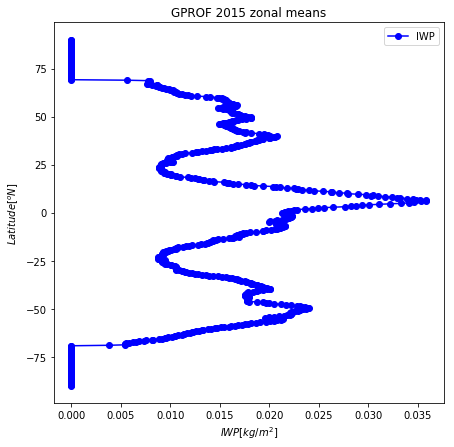

In [21]:
# plot zonal means
figz = plt.figure(figsize=[7,7])
zax = np.linspace(-1*latmax,latmax,ny)
#plt.plot(1000*zonal_mean_iwp[::-1]+zonal_mean_swp[::-1],zax,'r-o',label='SWP+CIWP')
#plt.plot(1000*zonal_mean_iwp[::-1],zax,'b-o',label='CIWP')
#plt.plot(1000*zonal_mean_swp[::-1],zax,'g-o',label='SWP')
#plt.plot(1000*(zonal_mean_swp[::-1]+zonal_mean_iwp[::-1]),zax,'k-o',label='CIWP+SWP')
plt.plot(zonal_mean_iwp[::-1],zax,'b-o',label='IWP')
#plt.plot(1000*zonal_mean_swp[:],zax,'g-o',label='SWP')
#plt.plot(1000*(zonal_mean_swp[:]+zonal_mean_iwp[:]),zax,'k-o',label='CIWP+SWP')
plt.xlabel(r'$IWP [kg/m^2]$')
plt.ylabel(r'$Latitude [^oN]$')
plt.title('GPROF 20'+yr+' zonal means')
plt.legend()
plt.show()
figz.savefig('img/gprof.20'+yr+'.zonal.jpg',dpi=400)

0
[0.0, 78.024413768791419, 6.1240739668933415, 6.1065608675459648]
0.001 2.8 1


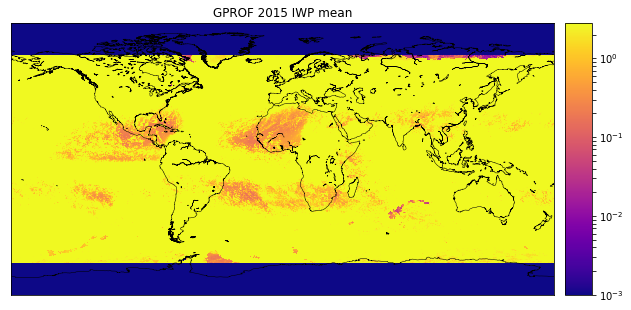

In [22]:
# plot global mean maps of CIWP/SWP
print(np.size(mean_grid_iwp[mean_grid_iwp != mean_grid_iwp]))
fig1 = plt.figure(figsize=[11,5])
print(info(mean_grid_iwp))
grdmap(np.flipud(mean_grid_iwp),-180,latmax,.001,2.8,1,'GPROF 20'+yr+' IWP mean')#+mon)
#grdmap(mean_grid_iwp,lomin=-180,lamin=70,vmin=.001,vmax=0.4,expflag=1,'ERA5 IWP')
fig1.savefig('img/gprof.20'+yr+'.iwp_grid.jpg',dpi=500)
#fig2 = plt.figure(figsize=[11,5])
#print(info(mean_grid_swp))
#grdmap(mean_grid_swp,-180,70,.001,0.2,1,'ERA5 20'+yr+' SWP mean')#+mon)
##grdmap(mean_grid_swp,lomin=-180,lamin=70,vmin=.001,vmax=0.4,expflag=1)
#fig2.savefig('img/era5.20'+yr+'.swp_grid.png',dpi=300)